<a href="https://colab.research.google.com/github/LennyRBriones/object_detection/blob/main/object_detection_II_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import pathlib
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

In [3]:
!git clone https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 86034, done.
remote: Counting objects: 100% (1633/1633), done.
remote: Compressing objects: 100% (691/691), done.
remote: Total 86034 (delta 1023), reused 1484 (delta 924), pack-reused 84401
Receiving objects: 100% (86034/86034), 598.81 MiB | 27.50 MiB/s, done.
Resolving deltas: 100% (61516/61516), done.


In [4]:
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 15.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to bui

In [5]:
!pip install tensorflow==2.10.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 100.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 93.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorfl

In [6]:
from object_detection.utils import visualization_utils as viz_utils

/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl5mutexC1Ev']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZNK10tensorflow4data11DatasetBase8FinalizeEPNS_15OpKernelContextESt8functionIFN3tsl8StatusOrISt10u

In [7]:
import tensorflow as tf

In [8]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [10]:
!unzip "/content/drive/MyDrive/Object detection practices/Data Sets/self_driving_cars.zip"

Streaming output truncated to the last 5000 lines.
  inflating: images/1479502279730506173.jpg  
  inflating: images/1479502280230536426.jpg  
  inflating: images/1479502280730839737.jpg  
  inflating: images/1479502281729824146.jpg  
  inflating: images/1479502282229848985.jpg  
  inflating: images/1479502282730102580.jpg  
  inflating: images/1479502283731724690.jpg  
  inflating: images/1479502284232432719.jpg  
  inflating: images/1479502285221790200.jpg  
  inflating: images/1479502285730163274.jpg  
  inflating: images/1479502286231098378.jpg  
  inflating: images/1479502287230097438.jpg  
  inflating: images/1479502287730246905.jpg  
  inflating: images/1479502288231261057.jpg  
  inflating: images/1479502288731301852.jpg  
  inflating: images/1479502289730529475.jpg  
  inflating: images/1479502290232668314.jpg  
  inflating: images/1479502291230742118.jpg  
  inflating: images/1479502292231318149.jpg  
  inflating: images/1479502293232480074.jpg  
  inflating: images/147950229

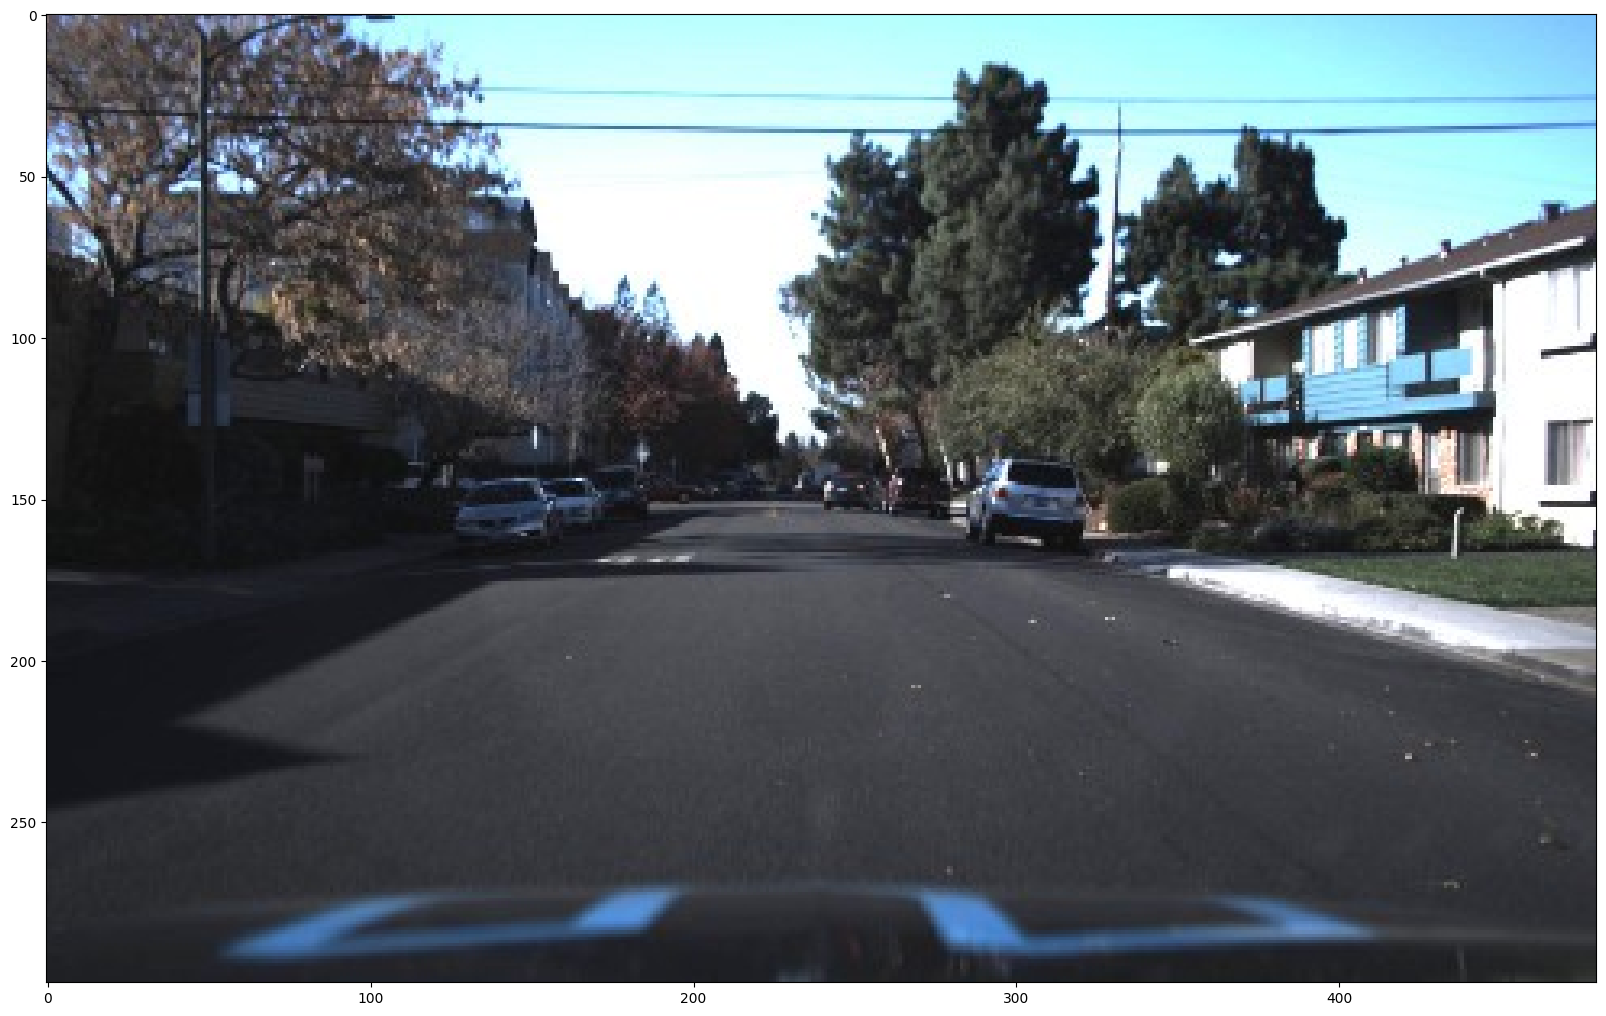

In [34]:
%matplotlib inline
plt.figure(figsize=(20, 20))
img = cv2.imread('images/1479506176491553178.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

## Exploring data

In [35]:
df = pd.read_csv("labels_train.csv")

In [36]:
df

,frame,xmin,xmax,ymin,ymax,class_id
0,1478019952686311006.jpg,237,251,143,155,1
1,1478019952686311006.jpg,437,454,120,186,3
2,1478019953180167674.jpg,218,231,146,158,1
3,1478019953689774621.jpg,171,182,141,154,2
4,1478019953689774621.jpg,179,191,144,155,1
...,...,...,...,...,...,...
132401,1479506176491553178.jpg,166,186,139,156,1
132402,1479506176491553178.jpg,182,204,142,153,1
132403,1479506176491553178.jpg,239,261,139,155,1
132404,1479506176491553178.jpg,259,280,139,157,1


In [37]:
print(img.shape)

(300, 480, 3)


In [38]:
gt_boxes={}
for index, row in df.iterrows():
  if row['class_id'] == 3:
    bbox = np.array([[row['ymin']/300, row['xmin']/480, row['ymax']/300, row['xmax']/480]], dtype=np.float32)
    if row['frame'] in gt_boxes:
      gt_boxes[row['frame']] = np.append(gt_boxes[row['frame']], np.array(bbox), axis =0)
    else:
      gt_boxes[row['frame']] = np.array(bbox)

In [39]:
my_path = "images/"
train_images_np = []

for image in gt_boxes.keys():
  im = cv2.imread(my_path + image)
  im = cv2.cvtColor

In [40]:
pedestrian_class_id = 1
num_classes = 1

category_index = {
    num_classes: {
        "id" : pedestrian_class_id,
        "name": "pedestrian"
    }
}

## Final visualization

IndexError: ignored

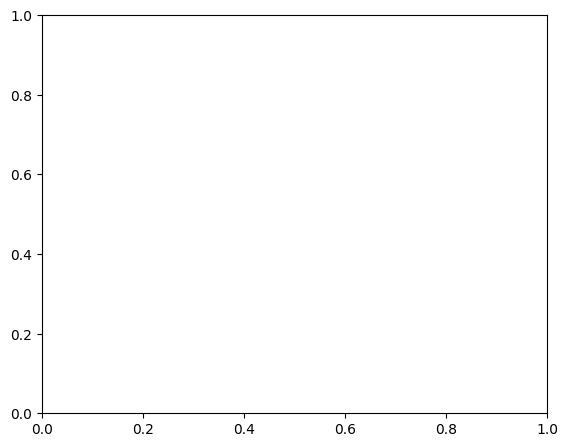

In [47]:
def plot_detections(image_np, boxes, classes, scores, category_index):
  image_np_with_annotations = image_np.copy()
  viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_annotations,
      boxes, 
      classes, 
      scores, 
      category_index, 
      use_normalized_coordinates=True, 
      min_score_thresh=0.5
  )
  plt.imshow(image_np_with_annotations)

plt.figure(figsize=(30, 30))
for idx in range(0, 20):
  bboxes = list(gt_boxes.values())[idx]
  dummy_scores = np.ones(shape=[bboxes.shape[0]], dtype=np.float32)
  plt.subplot(5, 4, idx+1)
  plot_detections(
      train_images_np[idx],
      bboxes, 
      np.ones(shape=[bboxes.shape[0]], dtype=np.int32), 
      dummy_scores,
      category_index
  )

plt.show()